In [2]:
########### PACKAGES #############

import torch
import torchvision 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import nn
from torch import optim

C:\Users\Chinmay Mittal\anaconda3\envs\ml\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Chinmay Mittal\anaconda3\envs\ml\lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [44]:
########### Creating Datasets ###########
transform = torchvision.transforms.Compose( [ torchvision.transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST( root = './MNIST_DATA' , download = True , train = True  , transform = transform )
train_dataset, val_dataset = torch.utils.data.random_split(mnist_data, [48000, 12000])
test_dataset = torchvision.datasets.MNIST ( "./MNIST_DATA" , train = False , transform = transform  , download = True)
val_loader = torch.utils.data.DataLoader( val_dataset) 
test_loader = torch.utils.data.DataLoader(  test_dataset ) 

training_batch_size = 128 
train_loader = torch.utils.data.DataLoader( train_dataset, batch_size = training_batch_size )


In [23]:
print ( train_dataset[0][0].shape ) 

torch.Size([1, 28, 28])


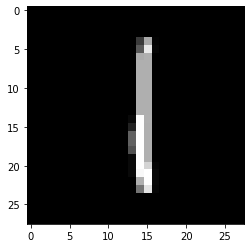

In [24]:
plt.imshow( train_dataset[0][0][0] , cmap = 'gray')

In [43]:
class CNN( nn.Module) : 
    def __init__ ( self) :
        super().__init__()
        self.ReLU = nn.ReLU() 
        self.conv1 = nn.Conv2d( 1 , 16 , 3 )
        self.conv2 = nn.Conv2d( 16, 32  , 3 )
        self.pool2 = nn.MaxPool2d( kernel_size = 2 , stride = 2 )
        self.dense1 = nn.Linear( 12*12*32 , 32 )
        self.dense2 = nn.Linear( 32 , 10  )
        self.dropout = nn.Dropout(0.5)
    def forward(self ,  image) :  
        x = image.view( -1 , 1 , 28 , 28 )
        x = self.ReLU ( self.conv1(x) ) 
        x = self.ReLU ( self.conv2(x) ) 
        x = self.pool2(x)
        x = x.view( -1 , 12*12*32 )
        x = self.dropout( x )
        x = self.ReLU ( self.dense1(x) ) 
        x = self.dense2(x)
        return x

In [45]:
model = CNN()
params = model.parameters()
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
loss_list  = [] 
n_epochs = 15
for epoch in range(n_epochs+1) : 
    for i , ( X , Y ) in enumerate(train_loader) : 
        X = torch.autograd.Variable(X)
        Y = torch.autograd.Variable(Y)
        output = model(X)
        optimizer.zero_grad()
        loss = lossFn( output , Y )
        loss.backward()
        optimizer.step()
        loss_list.append(loss)
    print(f"The Loss is {loss_list[-1]} for epoch {epoch}")

The Loss is 0.09480617195367813 for epoch 0
The Loss is 0.04743863642215729 for epoch 1
The Loss is 0.05354253575205803 for epoch 2
The Loss is 0.032401084899902344 for epoch 3
The Loss is 0.04331481456756592 for epoch 4
The Loss is 0.059222422540187836 for epoch 5
The Loss is 0.040990669280290604 for epoch 6
The Loss is 0.017694110050797462 for epoch 7
The Loss is 0.0719180703163147 for epoch 8
The Loss is 0.020646246150135994 for epoch 9
The Loss is 0.019590971991419792 for epoch 10
The Loss is 0.0291220061480999 for epoch 11
The Loss is 0.030039047822356224 for epoch 12
The Loss is 0.018605783581733704 for epoch 13
The Loss is 0.017319291830062866 for epoch 14
The Loss is 0.02319890633225441 for epoch 15


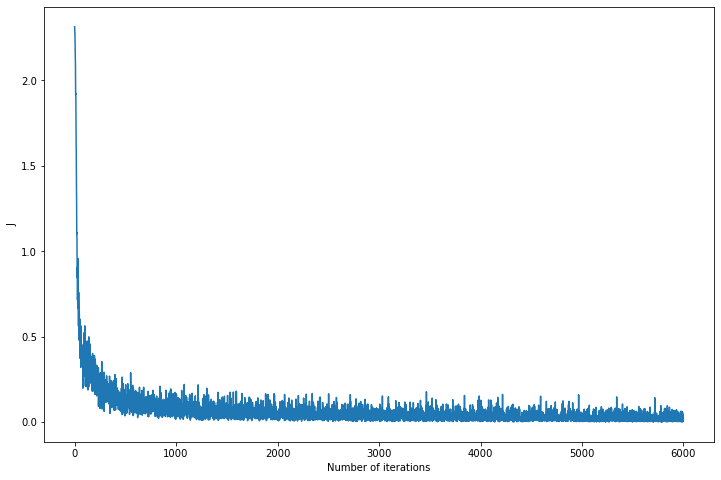

In [49]:
plt.figure( figsize = (12,8))
plt.plot( [ t.item() for t in loss_list ]   )
plt.ylabel("J")
plt.xlabel("Number of iterations");

In [47]:
correct = 0 
total = 0 
for i , (X , Y ) in enumerate(val_loader) : 
    with torch.no_grad(): 
        output = model(X)
        pred = torch.argmax( output ).item()
        if( pred == Y.item() ) : 
            correct += 1
        total += 1
print( f"The accuracy of the model on the validation dataset is {correct/total*100}" )

The accuracy of the model on the validation dataset is 98.35000000000001


In [42]:
correct = 0 
total = 0 
train_loader = torch.utils.data.DataLoader( train_dataset) 
for i , (X , Y ) in enumerate(train_loader) : 
    with torch.no_grad(): 
        output = model(X)
        pred = torch.argmax( output ).item()
        if( pred == Y.item() ) : 
            correct += 1
        total += 1
print( f"The accuracy of the model on the training dataset is {correct/total*100}" )

The accuracy of the model on the training dataset is 99.31458333333333
